In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3

%matplotlib inline


In [2]:
# Read relevant tables into pandas dataframe
# IMDB database
# ***IMPORTANT*** Make sure to unzip the "im.db.zip" file into "im.db"
con = sqlite3.connect('../data/im.db') 
cursor = con.cursor()
imdb_schema_df = pd.read_sql('''
SELECT 
    *
FROM
    sqlite_master
''', con)

In [3]:
movie_basics_df = pd.read_sql('''
SELECT 
    *
FROM
    movie_basics
''', con)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
movie_ratings_df = pd.read_sql('''
SELECT 
    *
FROM
    movie_ratings
''', con)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
# The Numbers movie information table
tn_movies_df = pd.read_csv('../data/tn.movie_budgets.csv.gz')

tn_movies_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
# TheMovieDB movie information table
tmdb_movies_df = pd.read_csv('../data/tmdb.movies.csv.gz')

tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
# # Merge the following pandas dataframes together
#   1. movie_basics_df (from IMDB database)
#   2. movie_ratings_df (from IMDB database)
#   3. tn_movies_df (from The Numbers database)
#   4. tmdb_movies_df (from The Movie database)

movie_basics_ratings_df = pd.read_sql('''
SELECT
    *
FROM 
    movie_basics
    LEFT JOIN movie_ratings
        ON movie_basics.movie_id = movie_ratings.movie_id
''', con)

movie_basics_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN


In [8]:
movie_basics_ratings_tmdb_df = movie_basics_ratings_df.merge(tmdb_movies_df,
                                                             left_on='primary_title',
                                                             right_on='title',
                                                             how='inner')
movie_basics_ratings_tmdb_df

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32.0,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",tt4503112,4.6,9.0,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",tt9181914,2.5,55.0,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,tt0192528,4.0,72.0,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23607,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,None,NaN,NaN,22942,"[35, 27]",475066,en,Vacancy,0.649,2017-10-27,Vacancy,9.0,1
23608,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,tt9777830,7.2,105.0,24840,[35],557606,en,John Leguizamo's Latin History for Morons,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13
23609,tt9814730,The Flare,The Flare,2017,63.0,Sport,None,NaN,NaN,23218,[],469698,en,The Flare,0.600,2017-07-11,The Flare,9.0,1
23610,tt9862978,Terra,Terra,2018,60.0,Documentary,None,NaN,NaN,25626,[27],536235,en,Terra,1.767,2018-04-24,Terra,5.0,1


In [9]:
movie_basics_ratings_tmdb_tn_df = movie_basics_ratings_tmdb_df.merge(tn_movies_df,
                                                                     left_on='title',
                                                                     right_on='movie',
                                                                     how='inner')

movie_basics_ratings_tmdb_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4549
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4550 non-null   object 
 1   primary_title      4550 non-null   object 
 2   original_title_x   4549 non-null   object 
 3   start_year         4550 non-null   int64  
 4   runtime_minutes    4088 non-null   float64
 5   genres             4474 non-null   object 
 6   movie_id           3361 non-null   object 
 7   averagerating      3361 non-null   float64
 8   numvotes           3361 non-null   float64
 9   Unnamed: 0         4550 non-null   int64  
 10  genre_ids          4550 non-null   object 
 11  id_x               4550 non-null   int64  
 12  original_language  4550 non-null   object 
 13  original_title_y   4550 non-null   object 
 14  popularity         4550 non-null   float64
 15  release_date_x     4550 non-null   object 
 16  title              4550 

In [10]:
# Remove columns not needed for analysis
#for column in movie_basics_ratings_tmdb_tn_df.colum
columns_to_drop = ['movie_id','primary_title', 'original_title_x', 'start_year',
       'runtime_minutes', 'movie_id','Unnamed: 0', 'id_x', 'original_language',
        'original_title_y','vote_average','title','id_y','release_date_y']

movie_basics_ratings_tmdb_tn_df.drop(columns = columns_to_drop,inplace=True)

In [11]:
# set movie column as dataframe index
movie_basics_ratings_tmdb_tn_df.set_index('movie',inplace=True)

In [12]:
# Remove any non-digit character from columns production_budget, domestic_gross
# and worldwide_gross and then convert the value for these columns to integer
for column_title in ['production_budget','domestic_gross','worldwide_gross']:
    movie_basics_ratings_tmdb_tn_df[column_title].replace('[^\d]','',inplace=True,regex=True)
    movie_basics_ratings_tmdb_tn_df[column_title] = movie_basics_ratings_tmdb_tn_df[
        column_title].astype(float)

In [13]:
#Change 'release_date_x' to datetime object and change column name to 'release_date'
movie_basics_ratings_tmdb_tn_df['release_date_x'] = pd.to_datetime(
    movie_basics_ratings_tmdb_tn_df['release_date_x'])

movie_basics_ratings_tmdb_tn_df.rename(columns ={'release_date_x' : 'release_date'},
                                      inplace=True)

In [14]:
movie_basics_ratings_tmdb_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, Foodfight! to The Magic Flute
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genres             4474 non-null   object        
 1   averagerating      3361 non-null   float64       
 2   numvotes           3361 non-null   float64       
 3   genre_ids          4550 non-null   object        
 4   popularity         4550 non-null   float64       
 5   release_date       4550 non-null   datetime64[ns]
 6   vote_count         4550 non-null   int64         
 7   production_budget  4550 non-null   float64       
 8   domestic_gross     4550 non-null   float64       
 9   worldwide_gross    4550 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 391.0+ KB


In [15]:
#Replace from 'genre_ids' column the brackets '[' and ']' surrounding the numbers
movie_basics_ratings_tmdb_tn_df['genre_ids'].replace('[\[\]]','',regex=True,inplace=True)


In [16]:
# Create a new column called 'Assigned_genre_ids' and assign to it the first number 
# from 'genre_ids
movie_basics_ratings_tmdb_tn_df['Assigned_genre_ids'] = movie_basics_ratings_tmdb_tn_df[
    'genre_ids'].map(lambda s: s.split(',')[0])
movie_basics_ratings_tmdb_tn_df

,genres,averagerating,numvotes,genre_ids,popularity,release_date,vote_count,production_budget,domestic_gross,worldwide_gross,Assigned_genre_ids
movie,,,,,,,,,,,
Foodfight!,"Action,Animation,Comedy",1.9,8248.0,"16, 28, 35, 10751",4.705,2013-05-07,46,45000000.0,0.0,73706.0,16
The Overnight,None,7.5,24.0,"9648, 35",6.576,2015-06-19,200,200000.0,1109808.0,1165996.0,9648
The Overnight,"Comedy,Mystery",6.1,14828.0,"9648, 35",6.576,2015-06-19,200,200000.0,1109808.0,1165996.0,9648
On the Road,"Adventure,Drama,Romance",6.1,37886.0,"12, 18",8.919,2012-12-21,518,25000000.0,720828.0,9313302.0,12
On the Road,Drama,NaN,NaN,"12, 18",8.919,2012-12-21,518,25000000.0,720828.0,9313302.0,12
...,...,...,...,...,...,...,...,...,...,...,...
Dragon Ball Super: Broly,"Action,Adventure,Animation",8.0,16465.0,"28, 16, 14, 12, 35, 878",6.868,2019-01-16,721,8500000.0,30376755.0,122747755.0,28
Teefa in Trouble,"Action,Comedy,Crime",7.4,2724.0,"18, 35, 28, 80",4.486,2018-07-20,11,1500000.0,0.0,98806.0,18
Fahrenheit 11/9,Documentary,6.7,11628.0,99,10.003,2018-09-10,142,5000000.0,6352306.0,6653715.0,99


In [17]:
# Drop rows where 'genre_ids' cell is empty
movie_basics_ratings_tmdb_tn_df.drop(
    movie_basics_ratings_tmdb_tn_df[
        movie_basics_ratings_tmdb_tn_df['genre_ids']== ''].index,inplace=True)

#drop rows if production_budget, domestic_gross or worldwide_gross has a value of zero
movie_basics_ratings_tmdb_tn_df.drop(movie_basics_ratings_tmdb_tn_df[
    (movie_basics_ratings_tmdb_tn_df['production_budget'] == 0) |
                 (movie_basics_ratings_tmdb_tn_df['domestic_gross'] == 0) | 
                 (movie_basics_ratings_tmdb_tn_df[
                     'production_budget'] == 0)].index,inplace=True)

#Remove rows with release date less that 2000
movie_basics_ratings_tmdb_tn_df.drop(movie_basics_ratings_tmdb_tn_df[
    movie_basics_ratings_tmdb_tn_df[
        'release_date'] < pd.to_datetime('2000')].index,inplace=True)

# Change data type for column 'Assigned_genre_ids' to integer
movie_basics_ratings_tmdb_tn_df['Assigned_genre_ids'] = movie_basics_ratings_tmdb_tn_df[
    'Assigned_genre_ids'].astype(int)


In [18]:
# Create a dictionary called 'genre_ids_dict' with key assocaited with 'Assigned_genre_ids'
# and values with writtten genre name  
genre_ids_dict = {
                28 : 'Action', 12 : 'Adventure', 16 : 'Animation', 35 : 'Comedy',
                80 : 'Crime', 99 : 'Documentary', 18: 'Drama', 10751 : 'Family',
                14 : 'Fantasy', 36 : 'History', 27 : 'Horror', 10402 : 'Music',
                9648 : 'Mystery', 10749 : 'Romance', 878 : 'Science Fiction',
                10770 : 'TV Movie', 53 : 'Thriller', 10752 : 'War', 37 : 'Western'}


# Create a column called 'Assigned_genre_name' and use the dictionary called 'genre_ids_dict
# input written genre name with the respective key
movie_basics_ratings_tmdb_tn_df['Assigned_genre_name'] = movie_basics_ratings_tmdb_tn_df[
    'Assigned_genre_ids'].map(lambda n: genre_ids_dict[n])

movie_basics_ratings_tmdb_tn_df

,genres,averagerating,numvotes,genre_ids,popularity,release_date,vote_count,production_budget,domestic_gross,worldwide_gross,Assigned_genre_ids,Assigned_genre_name
movie,,,,,,,,,,,,
The Overnight,None,7.5,24.0,"9648, 35",6.576,2015-06-19,200,200000.0,1109808.0,1165996.0,9648,Mystery
The Overnight,"Comedy,Mystery",6.1,14828.0,"9648, 35",6.576,2015-06-19,200,200000.0,1109808.0,1165996.0,9648,Mystery
On the Road,"Adventure,Drama,Romance",6.1,37886.0,"12, 18",8.919,2012-12-21,518,25000000.0,720828.0,9313302.0,12,Adventure
On the Road,Drama,NaN,NaN,"12, 18",8.919,2012-12-21,518,25000000.0,720828.0,9313302.0,12,Adventure
On the Road,Documentary,NaN,NaN,"12, 18",8.919,2012-12-21,518,25000000.0,720828.0,9313302.0,12,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
"Paul, Apostle of Christ","Adventure,Biography,Drama",6.7,5662.0,36,12.005,2018-03-28,98,5000000.0,17547999.0,25529498.0,36,History
Instant Family,"Comedy,Drama",7.4,46728.0,"35, 18",22.634,2018-11-16,782,48000000.0,67363237.0,119736188.0,35,Comedy
Hereditary,"Drama,Horror,Mystery",7.3,151571.0,"27, 9648, 53",26.185,2018-06-08,2491,10000000.0,44069456.0,70133905.0,27,Horror


In [19]:
# Create a dataframe called 'genre_ratings_df' by cpying 'movie_basics_ratings_tmdb_tn_df' 
# and rearrange columns so related columns palced to onanother

genre_ratings_df = movie_basics_ratings_tmdb_tn_df[['genres','genre_ids','Assigned_genre_ids',
                                                   'Assigned_genre_name','averagerating',
                                                    'numvotes','popularity','vote_count',
                                                    'release_date','production_budget',
                                                    'domestic_gross','worldwide_gross']].copy()

genre_ratings_df

,genres,genre_ids,Assigned_genre_ids,Assigned_genre_name,averagerating,numvotes,popularity,vote_count,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,,,,,
The Overnight,None,"9648, 35",9648,Mystery,7.5,24.0,6.576,200,2015-06-19,200000.0,1109808.0,1165996.0
The Overnight,"Comedy,Mystery","9648, 35",9648,Mystery,6.1,14828.0,6.576,200,2015-06-19,200000.0,1109808.0,1165996.0
On the Road,"Adventure,Drama,Romance","12, 18",12,Adventure,6.1,37886.0,8.919,518,2012-12-21,25000000.0,720828.0,9313302.0
On the Road,Drama,"12, 18",12,Adventure,NaN,NaN,8.919,518,2012-12-21,25000000.0,720828.0,9313302.0
On the Road,Documentary,"12, 18",12,Adventure,NaN,NaN,8.919,518,2012-12-21,25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Paul, Apostle of Christ","Adventure,Biography,Drama",36,36,History,6.7,5662.0,12.005,98,2018-03-28,5000000.0,17547999.0,25529498.0
Instant Family,"Comedy,Drama","35, 18",35,Comedy,7.4,46728.0,22.634,782,2018-11-16,48000000.0,67363237.0,119736188.0
Hereditary,"Drama,Horror,Mystery","27, 9648, 53",27,Horror,7.3,151571.0,26.185,2491,2018-06-08,10000000.0,44069456.0,70133905.0


In [20]:
genre_ratings_df['Profit'] = genre_ratings_df['worldwide_gross'] - genre_ratings_df['production_budget'] #creating Profit column

In [21]:
genre_ratings_df['ROI'] = genre_ratings_df['Profit'] / genre_ratings_df['production_budget'] * 100 #creating ROI column

In [23]:
genre_roi_df = genre_ratings_df.loc[:, ['Assigned_genre_name', 'ROI', 'Profit',  'production_budget', 'domestic_gross', 'worldwide_gross','release_date' 
                             ]] #creating ROI df to mess with, without editing genre_ratings df

In [35]:
genre_ratings_df['Assigned_genre_name'].value_counts()

Drama              937
Comedy             456
Action             399
Thriller           223
Horror             219
Adventure          157
Crime              147
Documentary        147
Romance            111
Animation           84
Science Fiction     84
Mystery             65
Fantasy             53
Family              29
History             24
War                 19
Western             12
Music                7
TV Movie             1
Name: Assigned_genre_name, dtype: int64

In [24]:
#combing low valued genres to similar genres
genre_mapping = {
    'Action': 'ActAdv',
    'Adventure': 'ActAdv',
    'War':'ActAdv',
    'Western':'ActAdv',
    'Drama' : 'Drama',
    'Thriller': 'Thriller',
    'Mystery': 'Thriller',
    'Horror': 'Horror',
    'Crime' : 'Crime',
    'Romance': 'Romance',
    'Documentary': 'Documentary',
    'History': 'Documentary',
    'Science Fiction': 'SciFan',
    'Fantasy': 'SciFan',
    'Family': 'Family',
    'Animation': 'Family',
    'Music': 'Family'    
}

In [25]:
genre_roi_df['Assigned_genre_name'] = genre_roi_df['Assigned_genre_name'].map(genre_mapping) 

In [26]:
genre_roi_df['Assigned_genre_name'].value_counts()

Drama          937
ActAdv         587
Thriller       288
Horror         219
Documentary    171
Crime          147
SciFan         137
Family         120
Romance        111
Name: Assigned_genre_name, dtype: int64

In [33]:
genre_roi_df.groupby('Assigned_genre_name').describe()

ROI                                                  \
                     count         mean          std        min        25%   
Assigned_genre_name                                                          
ActAdv               587.0   197.556498   353.429311 -99.917162  -1.840621   
Crime                147.0   117.412597   213.497870 -97.752766 -11.905932   
Documentary          171.0   130.033695   693.463176 -99.635600 -60.307427   
Drama                937.0   278.042682   776.454393 -99.878200 -43.394552   
Family               120.0   473.912091   968.709291 -96.245050  40.676618   
Horror               219.0  1138.739401  3531.523519 -99.883429  -1.971217   
Romance              111.0   963.255116  2170.712180 -99.105690  43.311822   
SciFan               137.0   607.609467  1190.825629 -99.784976  49.842067   
Thriller             288.0   529.203194  1543.085064 -99.986200  11.856649   

                                                          Profit  \
                            50%         75%           max  count   
Assigned_genre_name                                                
ActAdv               118.290785  278.671790   2617.924114  587.0   
Crime                 70.261803  220.502473   1234.932625  147.0   
Documentary          -33.533310  116.462700   6211.912000  171.0   
Drama                 74.016666  294.457947   9900.000000  937.0   
Family               200.351694  413.154068   6211.912000  120.0   
Horror               160.182977  887.303773  41556.474000  219.0   
Romance              345.676060  681.032075   8989.359138  111.0   
SciFan               221.958612  574.638176   5479.296120  137.0   
Thriller             192.692489  482.998000  21438.461538  288.0   

                                   ... domestic_gross               \
                             mean  ...            75%          max   
Assigned_genre_name                ...                               
ActAdv               1.622852e+08  ...   1.151739e+08  760507625.0   
Crime                3.980303e+07  ...   4.500112e+07  191719337.0   
Documentary          2.592591e+07  ...   3.008115e+07  248757044.0   
Drama                4.332602e+07  ...   3.691881e+07  356461711.0   
Family               2.574490e+08  ...   2.030480e+08  504014165.0   
Horror               5.362667e+07  ...   4.265656e+07  327481748.0   
Romance              1.191652e+08  ...   5.248172e+07  504014165.0   
SciFan               1.545208e+08  ...   1.264771e+08  623279547.0   
Thriller             5.917768e+07  ...   4.378726e+07  400738009.0   

                    worldwide_gross                                       \
                              count          mean           std      min   
Assigned_genre_name                                                        
ActAdv                        587.0  2.449383e+08  3.195815e+08    528.0   
Crime                         147.0  6.742235e+07  8.295379e+07  42557.0   
Documentary                   171.0  4.870474e+07  1.029242e+08   1822.0   
Drama                         937.0  6.690581e+07  1.329686e+08   2602.0   
Family                        120.0  3.280648e+08  3.636028e+08  44701.0   
Horror                        219.0  7.171733e+07  8.999127e+07   1632.0   
Romance                       111.0  1.454990e+08  2.445762e+08  25935.0   
SciFan                        137.0  2.054809e+08  2.945542e+08  10024.0   
Thriller                      288.0  8.313288e+07  1.581020e+08   1242.0   

                                                                          
                            25%          50%           75%           max  
Assigned_genre_name                                                       
ActAdv               35681080.0  126577874.0  3.224590e+08  2.776345e+09  
Crime                17856688.0   45043870.0  7.626933e+07  4.045617e+08  
Documentary           1884251.0    5953886.0  5.064742e+07  6.375174e+08  
Drama                 5391992.0   24215385.0  6.264676e+07  8.949

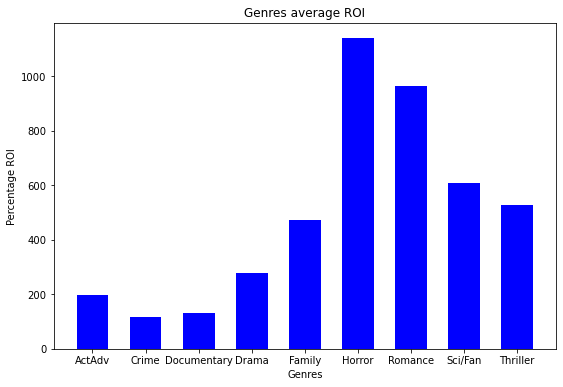

In [44]:
data = {'ActAdv':197, 'Crime':117, 'Documentary':130,
        'Drama':278, 'Family': 473, 'Horror':1140, 'Romance': 963, 'Sci/Fan': 607, 'Thriller': 529}
genre = list(data.keys())
percent_roi = list(data.values())
  
fig = plt.figure(figsize = (9, 6))
 
# creating the bar plot
plt.bar(genre, percent_roi, color ='blue',
        width = 0.6)
 
plt.xlabel("Genres")
plt.ylabel("Percentage ROI")
plt.title("Genres average ROI")
plt.show()